In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
continents = ["Africa", "North America", "South America", "Oceania", "Eastern Europe", "Western Europe", "Middle East", "South Asia", "Southeast-East Asia", "Central Asia"]

In [2]:
continents_features_file = np.load("./continents_new_features.npz")
continents_features_file.files

['arr_0']

In [3]:
continents_features = continents_features_file["arr_0"]
continents_features.shape

(770, 10, 2)

Check for nans

In [4]:
np.where(continents_features == np.nan)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

Check for Containment Index below 0

In [5]:
np.where(continents_features[:,:,0] < 0)

(array([], dtype=int64), array([], dtype=int64))

Check for Containment Index equal to 0}

In [6]:
np.where(continents_features[:,:,0] == 0)
# Index 769 is a blank column, can remove
# 768 is last day in dataset for containment index, has zeros for some countries

(array([768, 768, 768, 768, 768, 769, 769, 769, 769, 769, 769, 769, 769,
        769, 769]),
 array([1, 3, 4, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

Check for Number of Cases < 0

In [7]:
np.where(continents_features[:,:,1] < 0)

(array([], dtype=int64), array([], dtype=int64))

# Check if Values are Realistic

In [8]:
# Check if matches spreadsheet
continents_features[60,:,1]

array([  383., 11879.,   817.,   138.,   522., 26126.,  2105.,   228.,
         675.,    61.])

In [9]:
print(continents_features[:,:,1].max())
print(continents_features[:,:,1].mean())
print(np.median(continents_features[:,:,1]))
print(continents_features[:,:,1].min())

1641190.0
56799.781818181815
22368.5
0.0


In [10]:
np.where(continents_features[:,:,1] > 1000000)

(array([711, 712, 713, 714, 715, 718, 719, 720, 720, 721, 722, 726, 726,
        727, 727, 728, 729, 730, 732, 733, 734, 735, 736, 739, 740, 741,
        742, 743, 746, 747, 749, 755]),
 array([1, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))

# Visualize case trends among continents

In [11]:
continents = ["Africa", "North America", "South America", "Oceania", "Eastern Europe", "Western Europe", "Middle East", "South Asia", "Southeast-East Asia", "Central Asia"]
print(continents_features.shape)
print(continents_features[:,:,1].shape)

(770, 10, 2)
(770, 10)


In [13]:
def visualize_case_trends(country_num_cases_matrix):
    """
    This function will make a plot with 10 curves, 1 curve represents one of the 10 continents' number of 
    cases trend.
    Args:
        - country_num_cases_matrix: Shape (n_days, 10)
    """
    cases_dict = { continents[idx]: country_num_cases_matrix[:, idx] for idx in range(10) }
    visual_dict = pd.DataFrame(cases_dict)
    visual_dict["Day Index"] = list(range(len(country_num_cases_matrix)))
    plt.figure(figsize=(24,6))
    sns.lineplot(data=pd.melt(visual_dict, ["Day Index"], value_name="Containment Index", var_name="Continent"), x="Day Index", y="Containment Index", hue="Continent")
    plt.title("Containment Index by Continent")
    plt.savefig("./continent_containment_index_trends.png", bbox_inches="tight", facecolor="white")
    plt.show()

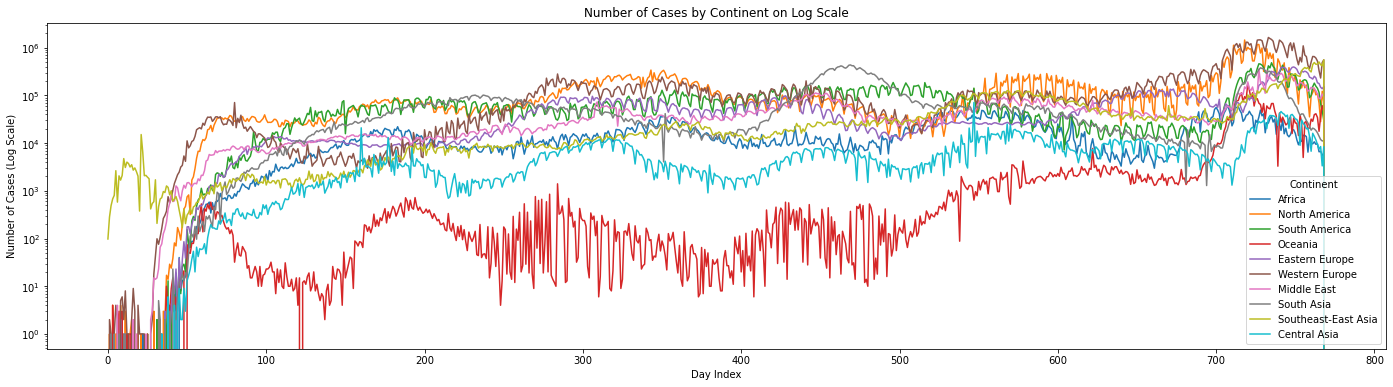

In [25]:
visualize_case_trends(continents_features[:,:,1])

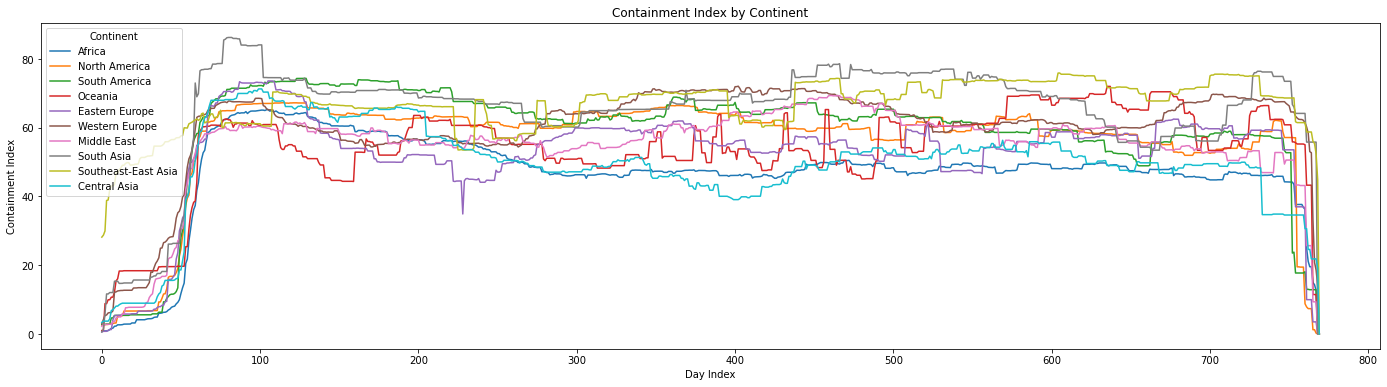

In [14]:
# Visualize containment index Trends, can use same function
visualize_case_trends(continents_features[:,:,0])

In [30]:
continents_features_log10 = np.zeros((continents_features.shape))
# Scale features by log10 scale
for i in range(len(continents_features)):
    for continent_idx in range(10):
        if continents_features[i, continent_idx, 1] != 0:
            continents_features_log10[i,continent_idx,1] = np.log10(continents_features[i, continent_idx, 1])

continents_features_log10.max()

6.215158862085973

In [32]:
continents_features_log10.shape

(770, 10, 2)

In [33]:
continents_features_log10[:,:,0].max()

0.0

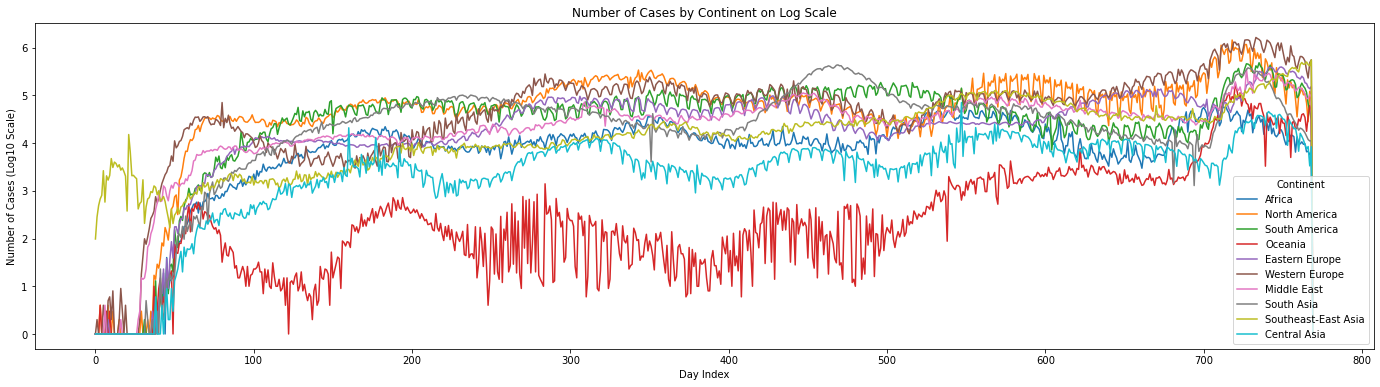

In [35]:
visualize_case_trends(continents_features_log10[:,:,1])

# Visualizing and Checking Flight Data

In [4]:
continents_flights_file = np.load("./continents_flight_np.npz")
continents_flights_file.files

['arr_0']

In [5]:
continents_flights = continents_flights_file["arr_0"]
continents_flights.shape

(999, 10, 10)

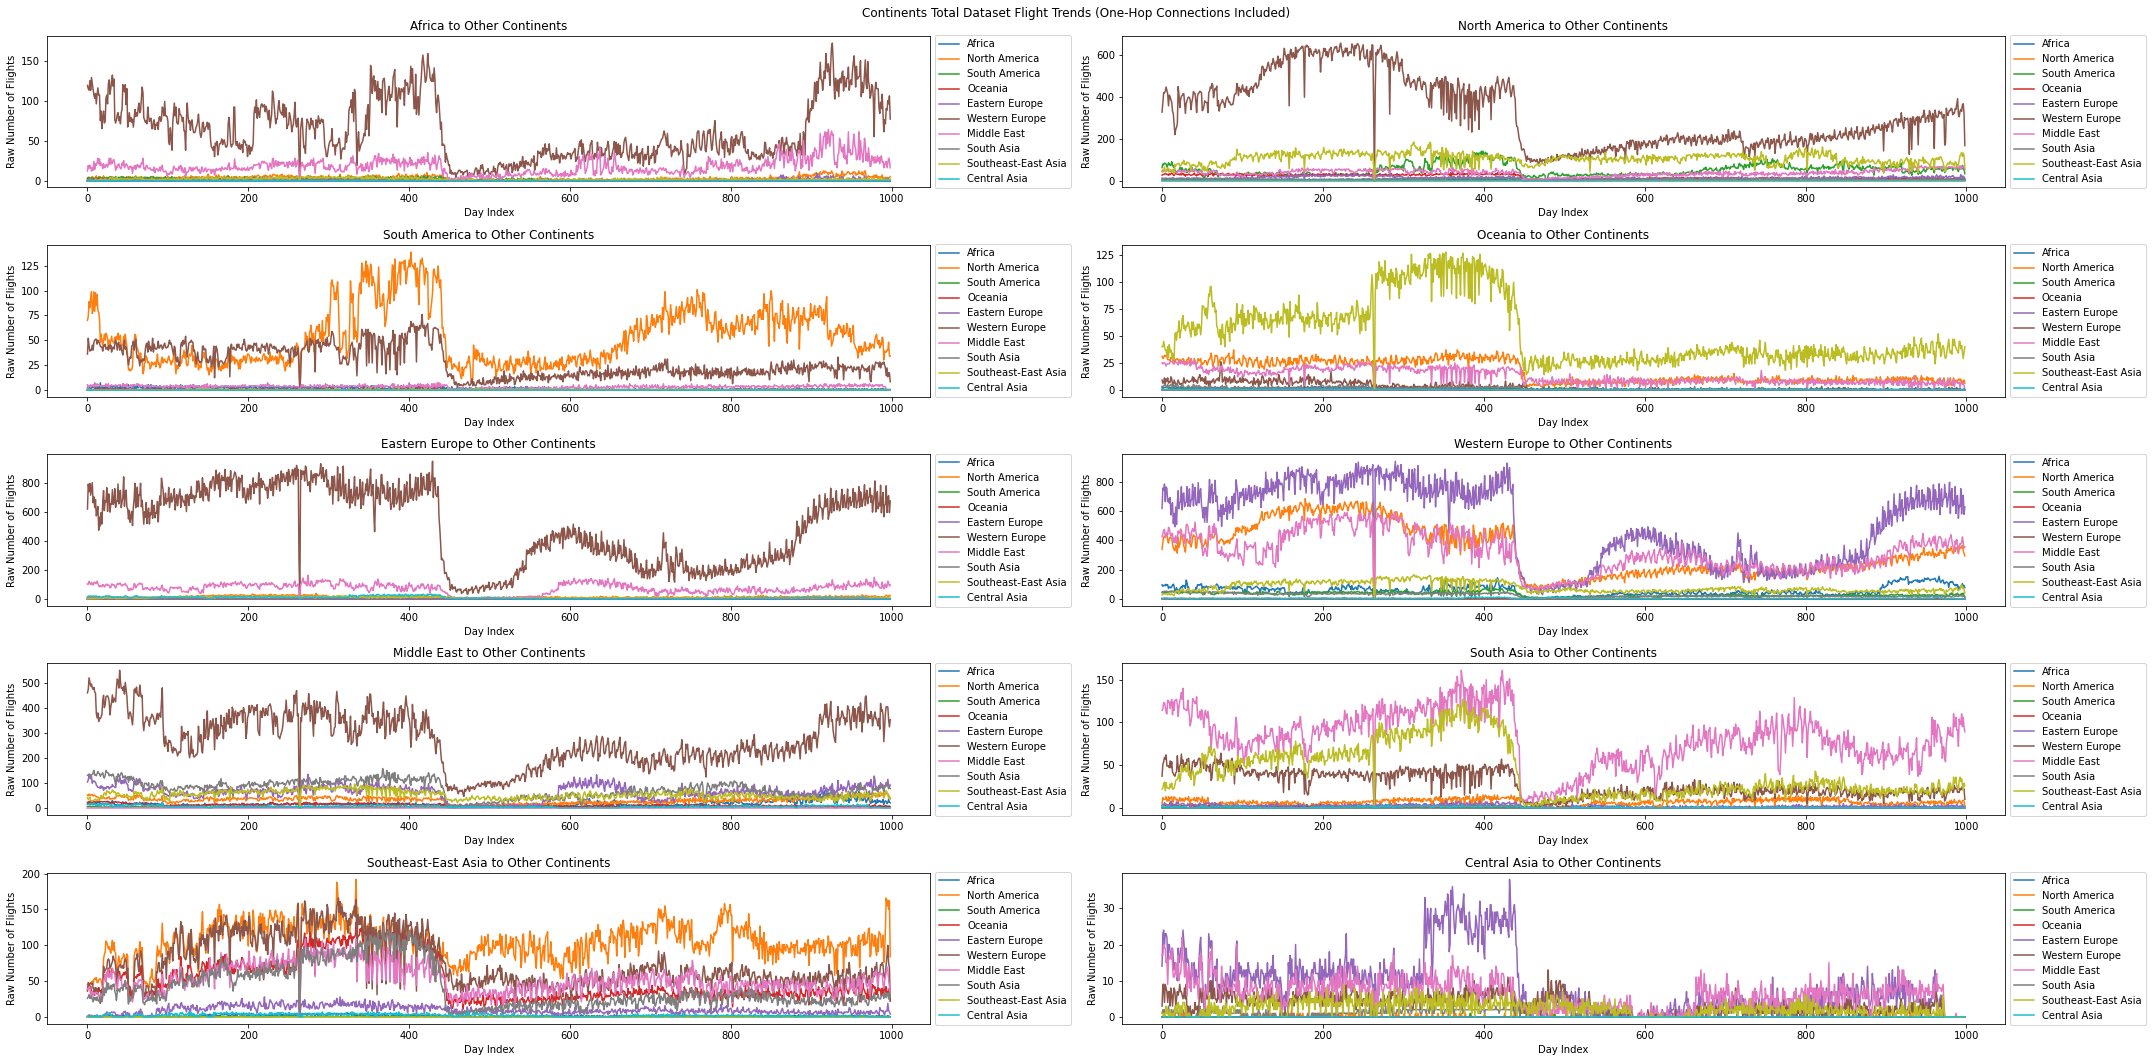

In [12]:
sns.reset_orig()
plt.figure(figsize=(30, 15))
for j in range(10):
    ax = plt.subplot(5,2,j+1)
    for i in range(10):
        if i != j:
            plt.plot(continents_flights[:,j,i], label=continents[i])
        else:
            plt.plot(np.zeros((len(continents_flights))), label=continents[i])
    plt.title(continents[j] + " to Other Continents")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('Day Index')  
    plt.ylabel('Raw Number of Flights')

plt.suptitle("Continents Total Dataset Flight Trends (One-Hop Connections Included)")
plt.tight_layout()
plt.savefig("./total_raw_flight_trends_continents_v16.png", facecolor="white", bbox_inches="tight")